maximum yield is:  0.6740582687216522 grams NCC out/grams cellulose in
temperature at maximum yield is:  [[384]] Kelvin


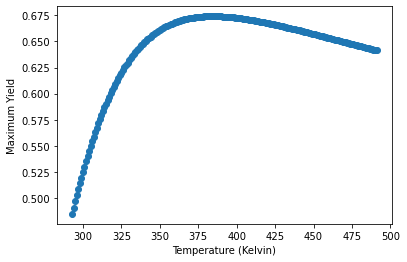

In [112]:
from scipy.integrate import odeint
import numpy as np
import math
import matplotlib.pyplot as plt

#define reaction conditions
T0 = 293 #room temperature in kelvin
Csa = 9.589 #mol/L ~62%
R = 8.3145 #ideal gas constant

#define reaction rate constants
k10 = 4.8059*(math.exp((-36353)/(R*T0)))*(Csa**3.8157) #reaction rate of cellulose to NCC
k20 = 0.00001*k10 #reaction rate of NCC to glucose (negligible)
k30 = 24.1186*(math.exp((-40222)/(R*T0)))*(Csa**3.2566) #reaction rate of cellulose to glucose
k40 = 0.01*k10 #reaction rate of glucose to degradation products (negligible)
k50 = 0 #reaction rate of lignocellulosic material to hemicellulosic sugars (negligible)

#define optimal reactor time
topt0 = (np.log((k10+k30)/k20))/(k10+k20-k30) #in minutes


#define maximum yield

Ymax0 = ((k10*1)/(k10+k30))*(((k10+k30)/k20)**((k20)/(k20-k10-k30)))

def k1(T):
    k1val = 4.8059*(math.exp((-36353)/(R*T)))*(Csa**3.8157) #reaction rate of cellulose to NCC
    return k1val

def k2(k1val):
    k2val = 0.00001*k1val #reaction rate of NCC to glucose (negligible)
    return k2val

def k3(T):
    k3val = 24.1186*(math.exp((-40222)/(R*T)))*(Csa**3.2566) #reaction rate of cellulose to glucose
    return k3val

def Ymax(k1val, k2val, k3val): #max yield at a given temperature
    Ymaxval = ((k1val*1)/(k1val+k3val))*(((k1val+k3val)/k2val)**((k2val)/(k2val-k1val-k3val)))
    return Ymaxval

temperatures = np.arange(293,494,1) #create an array of temperatures

varvector = np.empty(shape=(199,2),dtype='object') #create a blank array of values to fill

for i in range (temperatures[0],temperatures[199]):
    varvector[(i-293),0]=Ymax(k1(i),k2(i),k3(i))
    varvector[(i-293),1]=temperatures[i-293]

y,x=varvector.T
plt.scatter(x,y)
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Maximum Yield")
plt.show

maxyield = np.amax(varvector[:,0])
maxyieldindex = np.where(varvector[:,0] == maxyield)
maxyieldtemp = varvector[maxyieldindex,1]

print('maximum yield: ', maxyield, "grams NCC out/grams cellulose in")
print('temperature at maximum yield: ', maxyieldtemp, 'Kelvin')

residence time for max yield:  [[26.304131525549707]] minutes


<function matplotlib.pyplot.show(*args, **kw)>

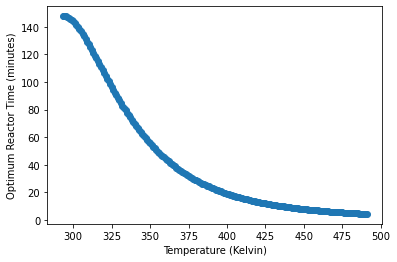

In [116]:
def topt(k1val,k2val,k3val):
    toptval = (np.log((k1val+k3val)/k2val))/(k1val+k2val-k3val) #in minutes
    return toptval

varvector2 = np.empty(shape=(199,2),dtype='object') #create a blank array of values to fill

for a in range (temperatures[0],temperatures[199]):
    varvector2[(a-293),0]=topt(k1(a),k2(a),k3(a))
    varvector2[(a-293),1]=temperatures[a-293]

maxyieldtime = varvector2[maxyieldindex,0]
print('residence time for max yield: ', maxyieldtime, 'minutes')

z,w = varvector2.T
plt.scatter(w,z)
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Optimum Reactor Time (minutes)")
plt.show